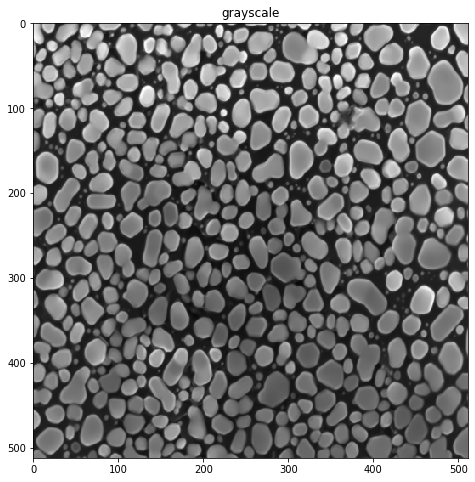

In [18]:
from skimage import color
from Utils import visualize
import cv2


image = cv2.imread('../data/007_p.png')

STRENGTH = 15
image = cv2.fastNlMeansDenoisingColored(image,None,10,10,STRENGTH,21)

image = cv2.resize(image,(int(512),int(512)))
    
visualize(image, f'grayscale')

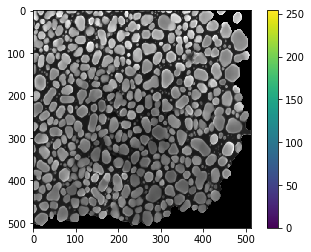

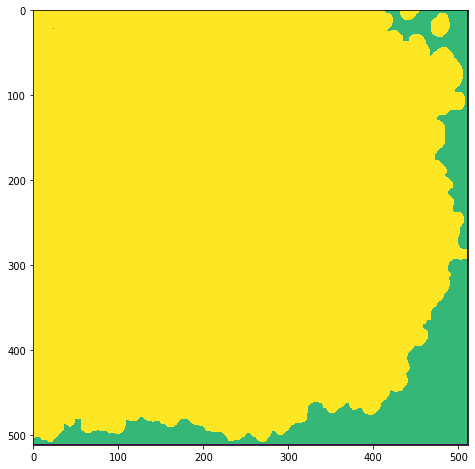

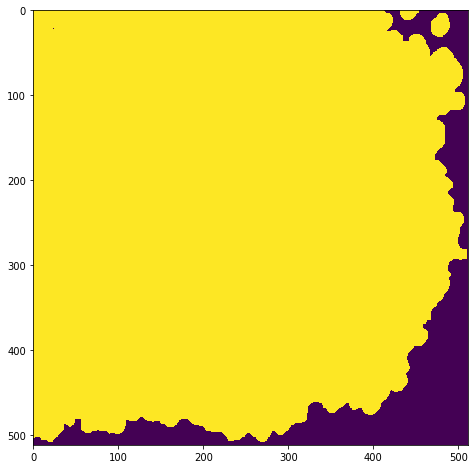

In [19]:

from matplotlib import pyplot as plt
import numpy as np

mask = np.zeros(image.shape[:2], np.uint8)
bgdModel = np.zeros((1, 65), np.float64)
fgdModel = np.zeros((1, 65), np.float64)

cv2.grabCut(image, mask, (0,0,*image.shape[0:2] - np.array([1,1])), bgdModel, fgdModel, 10,cv2.GC_INIT_WITH_RECT)

mask2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
image = image * mask2[:, :, np.newaxis]

plt.imshow(image)
plt.colorbar()
plt.show()

visualize(mask)
visualize(mask2)